# 2번째 과제 
## 목표  : 여러 개의 특성을 이용해서 모델을 학습시킨다.
train데이터를 이용해서 6개의 라벨 중 어떤 상황인지 예측(walking, walking_upstaris, walking_downstairs, sitting, standing, laying)

In [17]:
import numpy as np
from scipy import stats
import pandas as pd

In [18]:
# 데이터 불러오기
res = np.loadtxt('train\X_train.txt')

In [21]:
feature = {'mean': np.mean(res, axis=1)}
# 행 간의 평균을 계산

In [22]:
feature['std'] = np.std(res, axis=1)

In [23]:
feature['mad'] = stats.median_absolute_deviation(res, axis=1)

In [24]:
feature['max'] = np.max(res, axis=1)

In [25]:
feature['min'] = np.min(res, axis=1)

In [26]:
# sma(): Signal magnitude area
# feature['sma'] = stats.magni

In [27]:
# energy(): Energy measure. Sum of the squares divided by the number of values. 
# feature['energy'] = np.

In [28]:
# First quartile (Q1) 
Q1 = np.percentile(res, 25, interpolation = 'midpoint', axis = 1)
# Third quartile (Q3) 
Q3 = np.percentile(res, 75, interpolation = 'midpoint', axis = 1) 
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
feature['iqr'] = IQR

In [29]:
# feature['entropy'] = stats.entropy(res, axis=1)
# 값 다시 확인 (inf)값
# del feature['entropy']

In [30]:
# arCoeff(): Autorregresion coefficients with Burg order equal to 4
# feature['arCoeff'] = 

In [46]:
# correlation(): correlation coefficient between two signals
# df = pd.DataFrame(res)
# feature['correlation'] = df.corr(method = 'pearson')
del feature['correlation']
# 각 특성끼리의 상관계수. 561개의 특성끼리 상관계수가 계산되어서 561 X 561 차원이 나왔다.

In [99]:
# maxInds(): index of the frequency component with largest magnitude
# feature['maxInds']

In [31]:
# meanFreq(): Weighted average of the frequency components to obtain a mean frequency
# feature['meanFreq']

In [87]:
# skewness(): skewness of the frequency domain signal 
from scipy.stats import skew, kurtosis
# feature['skewness'] = skew(res)
# 왜도 역시 561행 -> 특성 당 왜도가 계산된다.

(561,)

In [96]:
# kurtosis(): kurtosis of the frequency domain signal 
# feature['kurtosis'] = kurtosis(res).shape
# 첨도 또한 561행

(561,)

In [ ]:
# bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
feature['bandsEnergy']

In [98]:
# angle(): Angle between to vectors.
# feature['angle'] = np.angle(res)
np.angle(res).shape

(7352, 561)

In [32]:
fea_res = np.vstack([v for k, v in feature.items()])
fea_res = fea_res.transpose()

In [33]:
y_res = np.loadtxt('train\Y_train.txt')
y_res.shape

(7352,)

In [54]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fea_res, y_res
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.533
테스트 세트 점수: 0.533


In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
kfold = KFold(n_splits=5)
scores = cross_val_score(logreg, fea_res, y_res, cv=kfold)
print("교차 검증 점수:\n",scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))

교차 검증 점수:
 [0.56968049 0.48402447 0.45714286 0.47891156 0.54557823]
교차 검증 평균 점수: 0.507


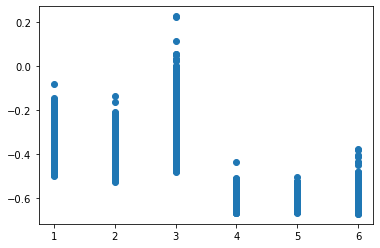

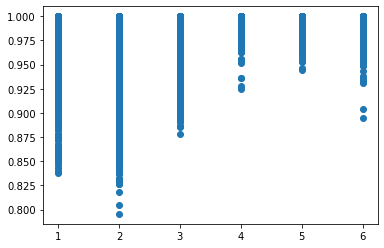

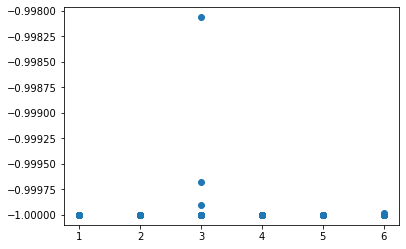

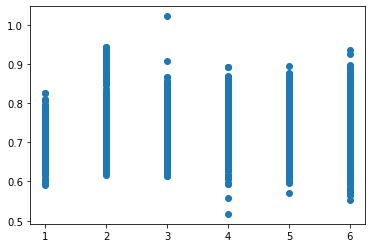

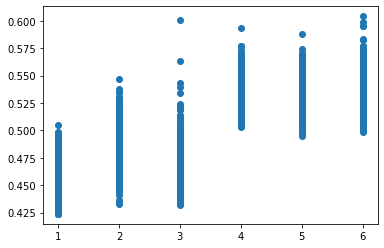

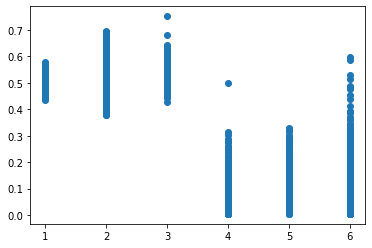

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_res, np.mean(res, axis=1))
plt.show()
plt.scatter(y_res, np.max(res, axis=1))
plt.show()
plt.scatter(y_res, np.min(res, axis=1))
plt.show()
plt.scatter(y_res, IQR)
plt.show()
plt.scatter(y_res, np.std(res, axis=1))
plt.show()
plt.scatter(y_res, stats.median_absolute_deviation(res, axis=1))
plt.show()


#### 만든 feature 6개(mean, max, min, iqr, std, mad)와 y_label과의 관계를 알아보기 위해 산점도를 그려보았다.
#### 내가 느끼기엔 mean, std, mad 정도가 1 2 3 / 4 5 6 의 차이를 보여줬다고 생각한다.
1 WALKING 2 WALKING_UPSTAIRS 3 WALKING_DOWNSTAIRS<br>
4 SITTING 5 STANDING 6 LAYING<br>

움직이고, 멈춰있는 상태를 구별한 것 같다.
그래서 50퍼센트에 가까운 정확도가 나온 것 같다.

### 이번엔 소프트맥스 회귀를 이용해서 분류해보았다.

In [53]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fea_res, y_res
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.1, random_state=42)
softmax_reg.fit(X_train, y_train)
print("복잡도 = 0.1 (기본값보다 낮은 복잡도 - 단순해질것이라고 예상-과소적합)")
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(softmax_reg.score(X_test, y_test)))
print("")

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1, random_state=42)
softmax_reg.fit(X_train, y_train)
print("복잡도 = 1 (기본값)")
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(softmax_reg.score(X_test, y_test)))
print("")

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)
print("복잡도 = 10 (기본값보다 높은 복잡도(규제 down))")
print("훈련 세트 점수: {:.3f}".format(softmax_reg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(softmax_reg.score(X_test, y_test)))
print("")

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=100, random_state=42)
softmax_reg.fit(X_train, y_train)
print("복잡도 = 100 (기본값보다 훨씬 높은 복잡도)")
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(softmax_reg.score(X_test, y_test)))

복잡도 = 0.1 (기본값보다 낮은 복잡도 - 단순해질것이라고 예상-과소적합)
훈련 세트 점수: 0.533
테스트 세트 점수: 0.484

복잡도 = 1 (기본값)
훈련 세트 점수: 0.533
테스트 세트 점수: 0.533

복잡도 = 10 (기본값보다 높은 복잡도(규제 down))
훈련 세트 점수: 0.550
테스트 세트 점수: 0.557

복잡도 = 1 (기본값보다 훨씬 높은 복잡도)
훈련 세트 점수: 0.533
테스트 세트 점수: 0.550


소프트맥스 회귀를 통해 복잡도를 조절해보면서 모델을 훈련시켜보았다.

역시 데이터 자체가 불충분해서 점수가 크게 오르진 않았지만 복잡도에 따라서 점수의 변화를 볼 수 있었다.

복잡도 10 정도가 가장 적당해보였고 복잡도가 낮아지면 과소적합이 일어나서 훈련, 테스트 둘다 점수가 낮았다.

또한 복잡도를 더 늘려보았더니 오히려 점수가 더 내려갔다. 훈련 세트에 과대적합이 되어 테스트 점수가 더 낮아졌다고 생각한다.

결국엔 데이터 전처리, 특성을 잘 선별해서 모델에 넣어주는 것이 중요하다고 느꼈다.

처음 실습과제라 이것저것 환경 세팅 및 사용법 등 다른 것에 시간을 많이 사용해서 충분한 시간동안 과제를 수행하지 못해서 아쉽다.

또한 데이터셋이 매우 낯설어서 어떻게 처리를 해야할지 많이 어려웠다.

feature들에 대해 공부를 더 해서 차원도 맞춰서 데이터에 넣었더라면 더 좋은 모델이 학습되었겠다는 생각도 했다.
